<a href="https://colab.research.google.com/github/pparutto/BINF2025_TP6/blob/main/BINF2025_tp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BINF TP6 : bases de données métaboliques et rdkit

Les bases de données métaboliques stockent des informations sur les composés et réaction chimiques présentes chez différents organismes ainsi que les enzymes associées. rdkit est une bibliothèque de manipulation de composés et réactions chimiques.

Installons rdkit :

In [1]:
!pip install rdkit

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 2.1 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


## Exercice 1 : Base de données Kegg et visualisation du cycle TCA

[https://www.genome.jp/kegg/](https://www.genome.jp/kegg/)

1. Utilisez le module «pathway » de la base de donnes Kegg pour visualiser le cycle de l’acide citrique. Appelé en anglais : TCA cycle, citric acid cycle ou encore Krebs cycle.
2. Combien de reactions contient-il ? On s'intéresse uniquement aux réactions du cycle contenant l'acide citrique.

8

3. Quels sont les identifiants EC (E.C numbers) associes à chacune de ces réactions.

- 4.2.1.3
- 1.1.1.42
- 1.2.4.2
- 6.2.1.5
- 1.3.5.1
- 4.2.1.2
- 1.1.1.37
- 2.3.3.1

4. Pourquoi certains identifiants EC sont-ils en double ?

Même transformation, mais catalysée par des enzymes différentes.

5. Qu’observez-vous de plus à propos de ces EC numbers ?

La majorité sont des oxydoréductases car le cycle est principalement une série de réactions d’oxydation.

Malheureusement la base de données KEGG ne peut pas être téléchargée gratuitement, nous allons donc changer de base de données.

## Exercice 2 : Base de données Rhea et visualisation du cycle TCA

[https://www.rhea-db.org/](https://www.rhea-db.org/)

A L’inverse, la base de données Rhea est téléchargeable, mais elle ne fournit pas de visualisation des voies métaboliques. C’est pour ça que l’on a fait la partie précédente avec KEGG.


1. Trouvez les IDs Rhea associés aux EC numbers extraits dans l'exercice précédent. Faites attention à choisir des réactions unidirectionnelles. Si vous avez l’id d’une réaction bidirectionnelle, id+1 et id+2 devraient correspondre aux réactions décomposées dans chaque sens. Faites attention au sens de réaction.

- 4.2.1.3 -> 10337
- 1.1.1.42 -> 19630
- 1.2.4.2 -> 12189
- 2.3.1.61 -> 15215
- 6.2.1.4 -> 22122
- 1.3.2.4 -> 77904
- 4.2.1.2 -> 12462
- 1.1.1.37 -> 21433
- 2.3.3.1 -> 16846

2. Téléchargez Rhea, choisissez le format « rhea-reaction-smiles.tsv ». Quel est ce format ?

Tab separated values, comme un csv mais avec des tabulations a la place des virgules

3. Chargez ce fichier via RdKit via "rdChemReactions.ReactionFromSmarts" du module rdkit.Chem

In [8]:
import rdkit

# Remplace par le chemin vers ton fichier téléchargé
fichier = "rhea-reaction-smiles.tsv"

# Lecture du fichier ligne par ligne
reactions = []

with open(fichier, "r", encoding="utf-8") as f:
    for line in f:
        if line.startswith("#") or not line.strip():
            continue  # Ignore les commentaires et les lignes vides
        parts = line.strip().split("\t")

        try:
            smarts = parts[1]
            rxn = rdkit.Chem.rdChemReactions.ReactionFromSmarts(smarts)
            if rxn is not None:
                reactions.append(rxn)
        except Exception as e:
            print(f"Erreur lors du chargement d'une réaction : {e}")
            continue


4. Cherchez dans ces réactions celles associées au cycle TCA en vous basant sur l’ID Rhea.

RHEA:10337


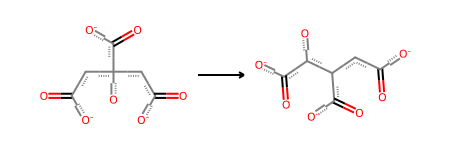

RHEA:12189


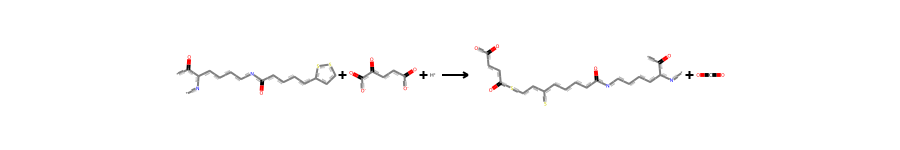

RHEA:12462


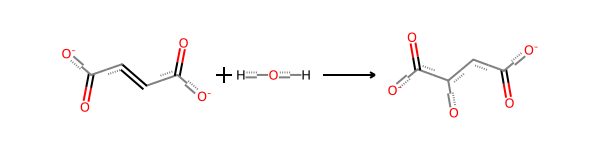

RHEA:15215


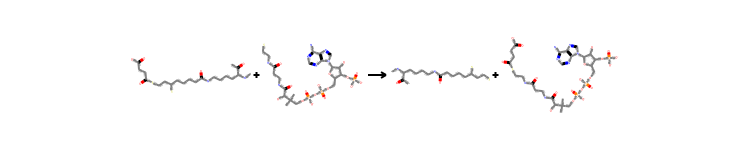

RHEA:16846


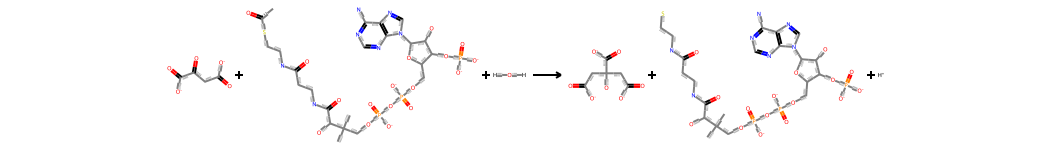

RHEA:19630


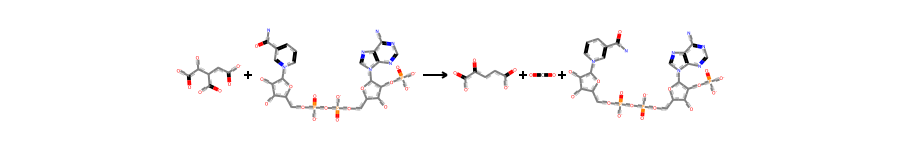

RHEA:21433


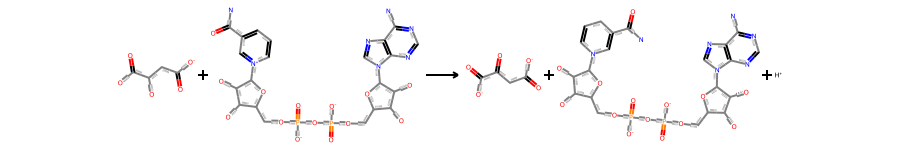

RHEA:22122


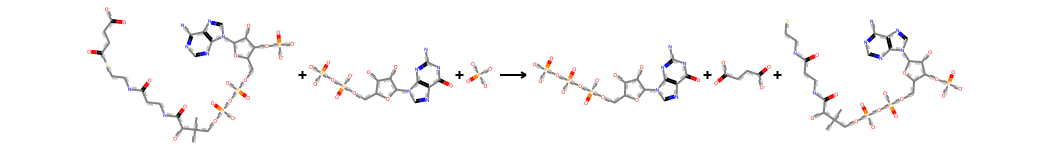

RHEA:77904


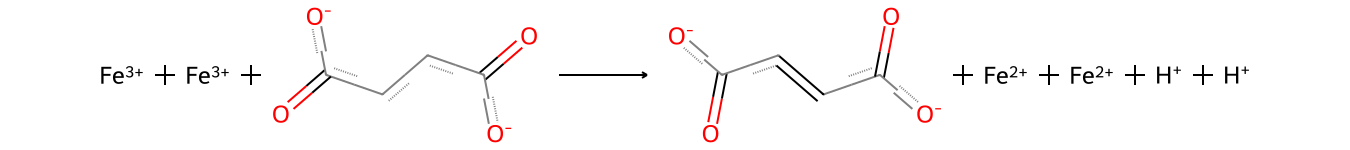

In [10]:
from rdkit.Chem import rdChemReactions
from IPython.display import display

tca_rhea_ids = {
    "10337", "19630", "12189", "15215", "22122", "77904", "12462", "21433", "16846"
}


with open("rhea-reaction-smiles.tsv", "r") as file:
    for line in file:
        rhea_id, reaction_smiles = line.strip().split("\t")
     
        if rhea_id in tca_rhea_ids:
            rxn = rdChemReactions.ReactionFromSmarts(reaction_smiles)
            print(f"RHEA:{rhea_id}")
            display(rxn)
            

5. Affichez les réactions du cycle TCA, vous pouvez utiliser la fonction display de « IPython.display » sur une réaction, vous devez aussi importer

« from rdkit.Chem.Draw import IPythonConsole »


## Exercice 3 : RdKit

1.	Pour se familiariser avec Rdkit et le format MOL nous allons faire un parser de MOL.
Ecrire la fonction load_mol(fname: str) -> Chem.Mol qui prend un fichier mol en entrée et retourne la molécule associée au format Mol de RdKit.
Utilisez Chem.Mol, Chem.EditableMol, m.AddAtom, m.AddBond

In [ ]:
print("votre code ici !!")


2.	Ecrire la fonction raw_formula(m: Chem.Mol) -> str qui retourne la formule brute de la molécule m.
Utilisez GetAtoms sur une molécule pour récupérer les listes des atomes et GetSymbol sur un atome pour récupérer son symbole.

In [ ]:
print("votre code ici !!")

3.	Récupérez les smiles et inchi de la molécule "citrulline" à partir des bases de données Rhea et pubchem. Puis :

* Comparez les Smiles ;
* Chargez les molécules dans rdkit via « Chem.MolFromSmiles» et comparez-les ;
* Comparez les formules brutes généré par votre fonction précédente ;
* Comparez les smiles générés par « Chem.MolToSmiles » ;
* Testez la méthode « m.HasSubstructMatch(m2) ».

In [ ]:
print("votre code ici !!")

4.	A quelle molécule correspond ce smiles :

C[NH2+] [C@H] 1[C@H] (O) [C@@H] (O) [C@H] (CO) O[C@H] 1O[C@H] 1[C@@H] (O[C@@H] (C) [C@] 1(O) CO) O[C@H] 1[C@H] (O) [C@@H] (OP([O- ] ) ([O- ] ) =O) [C@H] (NC(N) =[NH2+] ) [C@@H] (O) [C@@H] 1NC(N) =[NH2+]

votre réponse ici!